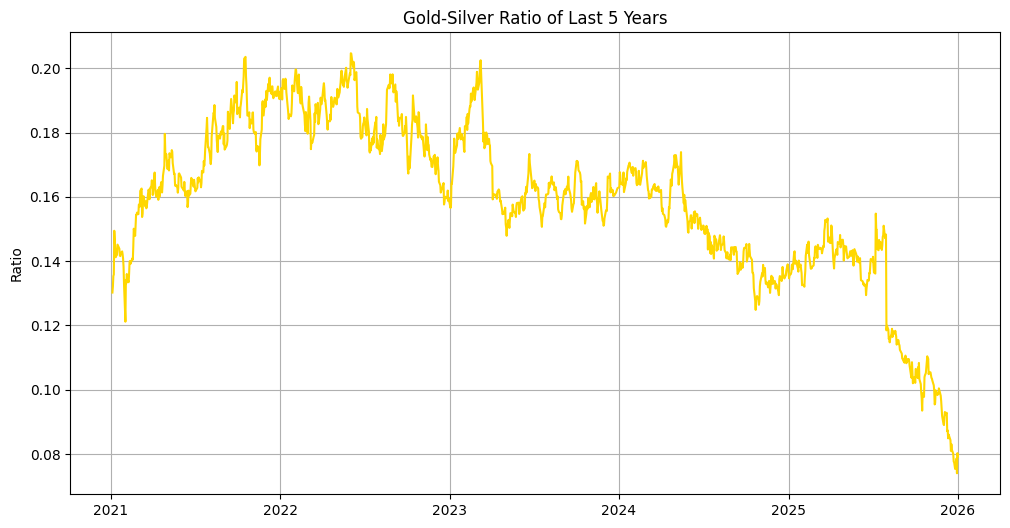

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/metals_data.csv', index_col='Date', parse_dates=True)

# Calculate Log Returns
# np.log(Price / Price_Yesterday)
log_returns = np.log(df / df.shift(1)).dropna()

# Calculate the Gold-Silver Ratio (GSR)
df['GSR'] = df['Gold'] / df['Silver']

# 4. Visualize the GSR
plt.figure(figsize=(12, 6))
plt.plot(df['GSR'], color='gold')
plt.title('Gold-Silver Ratio of Last 5 Years')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

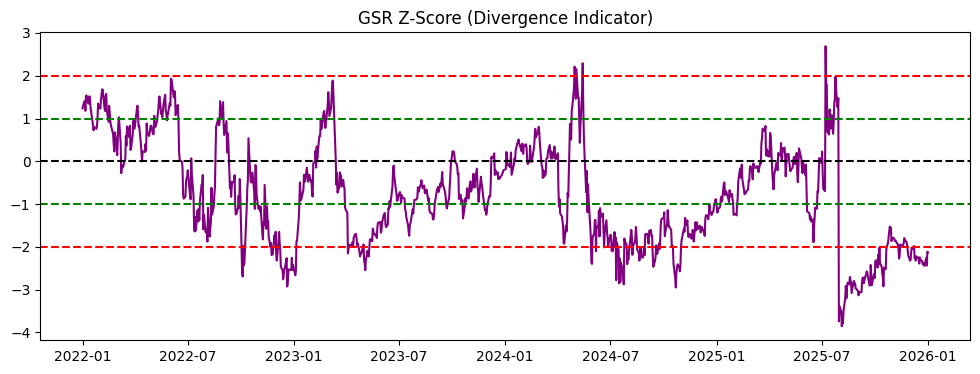

In [4]:
# Calculate the Rolling Mean (Moving Average)
df['GSR_Mean'] = df['GSR'].rolling(window=252).mean() # 252 days = 1 trading year

# Calculate Z-Score (How many standard deviations away from the mean are we
window = 252
rolling_std = df['GSR'].rolling(window=window).std()
df['Z_Score'] = (df['GSR'] - df['GSR_Mean']) / rolling_std

# Plot the Z-Score
plt.figure(figsize=(12, 4))
plt.plot(df['Z_Score'], color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(2, color='red', linestyle='--')  # Upper "Sell" Threshold
plt.axhline(-2, color='red', linestyle='--') # Lower "Buy" Threshold
plt.title('GSR Z-Score (Divergence Indicator)')
plt.show()